# Video Game Sales
> Dataset from: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## Import Libraries

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Helper Functions

### Ploting Data

In [191]:
def plot_scatter(x_label: str, y_label:str, dataset:pd.DataFrame, hue:[str, None]=None):
    plt.scatter(x_label,y_label,data=dataset, c=hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print('correlation')
    print(dataset[x_label].corr(dataset[y_label]))

## Preprocess Data

### Import Data

In [192]:
df_org = pd.read_csv('../data/Video_Games_Sales_as_at_22_Dec_2016.csv')

df_org.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Get Information about data

In [193]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [194]:
df_org.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

(array([2459., 2133., 1441.,  892.,  568.,  300.,  204.,  106.,   27.,
           7.]),
 array([  3.,  14.,  25.,  36.,  47.,  58.,  69.,  80.,  91., 102., 113.]),
 <BarContainer object of 10 artists>)

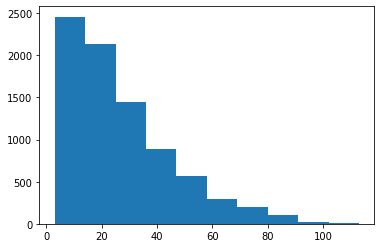

In [195]:
plt.hist(df_org.Critic_Count)

(array([1811., 1506.,  848.,  500.,  379.,  256.,  191.,  176.,  151.,
         108.,  104.,   91.,   81.,   82.,   50.,   48.,   46.,   52.,
          38.,   29.,   37.,   28.,   30.,   30.,   21.,   16.,   28.,
          18.,   25.,   22.,   16.,   21.,   16.,   13.,   15.,   15.,
          15.,    9.,   17.,    9.,   11.,    5.,    7.,   18.,   14.,
          14.,   10.,    6.,    9.,    9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500.]),
 <BarContainer object of 50 artists>)

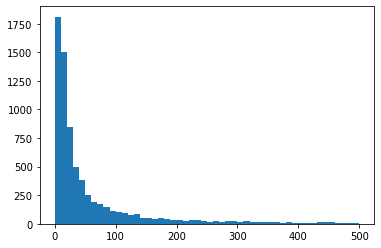

In [196]:
plt.hist(df_org.User_Count, bins=50, range=(0, 500))

### Clean up

In [197]:
df_org.columns


new_columns = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
df = df_org.drop([c for c in df_org.columns if c not in new_columns], axis=1)

df.dropna(inplace=True)

df.User_Score = pd.to_numeric(df.User_Score) * 10

min_Critic_Count = 30
min_User_Count = 100
df = df.drop(df[df.Critic_Count < min_Critic_Count].index)
df = df.drop(df[df.User_Count < min_User_Count].index)

average_score = (df.Critic_Score + df.User_Score) / 2
df['Average_Score'] = average_score

df

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Average_Score
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,80.0,322.0,78.0
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,83.0,709.0,82.5
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,80.0,192.0,80.0
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,85.0,431.0,87.0
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,66.0,129.0,62.0
...,...,...,...,...,...,...,...,...,...,...
16211,Serious Sam II,PC,2005.0,Shooter,0.01,74.0,31.0,70.0,152.0,72.0
16300,BattleForge,PC,2009.0,Strategy,0.01,75.0,37.0,70.0,112.0,72.5
16400,TimeShift,PC,2007.0,Shooter,0.01,71.0,30.0,76.0,124.0,73.5
16624,Trine,PC,2009.0,Action,0.01,80.0,50.0,82.0,488.0,81.0


## Visualize Data

In [198]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Average_Score
Year_of_Release,1.000000,-0.110121,-0.272940,0.085866,-0.359231,0.142365,-0.361529
Global_Sales,-0.110121,1.000000,0.187949,0.195369,0.047823,0.165506,0.124242
Critic_Score,-0.272940,0.187949,1.000000,0.213037,0.569555,0.278169,0.857973
Critic_Count,0.085866,0.195369,0.213037,1.000000,0.121727,0.267787,0.183025
User_Score,-0.359231,0.047823,0.569555,0.121727,1.000000,-0.080259,0.910896
User_Count,0.142365,0.165506,0.278169,0.267787,-0.080259,1.000000,0.089487
Average_Score,-0.361529,0.124242,0.857973,0.183025,0.910896,0.089487,1.000000


correlation
-0.11012119082556372


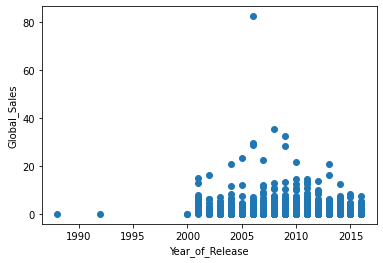

In [199]:
plot_scatter('Year_of_Release', 'Global_Sales', df)

correlation
0.12424190603611171


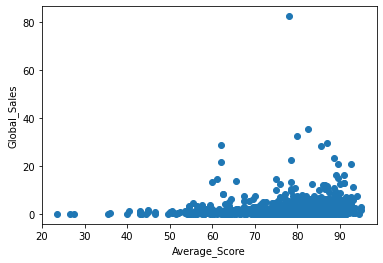

In [200]:
plot_scatter('Average_Score', 'Global_Sales', df)

correlation
0.5695550818781139


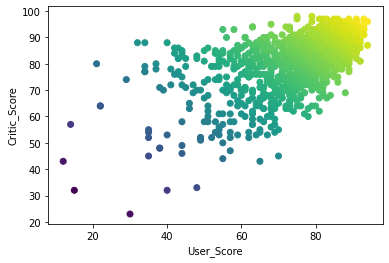

In [201]:
plot_scatter('User_Score', 'Critic_Score', df, hue='Average_Score')

correlation
-0.3615288666101074


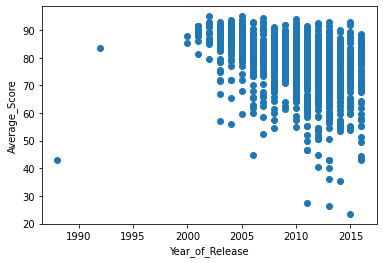

In [202]:
plot_scatter('Year_of_Release', 'Average_Score', df)

## Linear Model

### clean up data

In [203]:
new_columns = ['Year_of_Release', 'Average_Score']
df_linear = df.drop([c for c in df.columns if c not in new_columns], axis=1)

df_linear

,Year_of_Release,Average_Score
0,2006.0,78.0
2,2008.0,82.5
3,2009.0,80.0
6,2006.0,87.0
7,2006.0,62.0
...,...,...
16211,2005.0,72.0
16300,2009.0,72.5
16400,2007.0,73.5
16624,2009.0,81.0


### build Model

In [204]:
X = df_linear.values[:, 0:1]
y = df_linear.iloc[:, 1:2]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)

### visualize Model

Model Accuracy:  0.13508950600189795


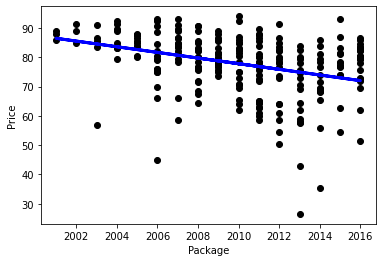

In [206]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xlabel('Year_of_Release')
plt.ylabel('Average_Score')

accuracy_score = lin_reg.score(X_train, y_train)
print('Model Accuracy: ', accuracy_score)

## Polynomial Model

### clean up data

In [207]:
new_columns = ['Year_of_Release', 'Average_Score']
df_poly = df.drop([c for c in df.columns if c not in new_columns], axis=1)

df_poly

,Year_of_Release,Average_Score
0,2006.0,78.0
2,2008.0,82.5
3,2009.0,80.0
6,2006.0,87.0
7,2006.0,62.0
...,...,...
16211,2005.0,72.0
16300,2009.0,72.5
16400,2007.0,73.5
16624,2009.0,81.0


### build Model

In [208]:
X = df_poly.values[:, 0:1]
y = df_poly.iloc[:, 1:2]

In [216]:
pipeline = make_pipeline(PolynomialFeatures(10), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

pipeline.fit(np.array(X_train), y_train)

y_pred = pipeline.predict(X_test)

### viusalizing Model

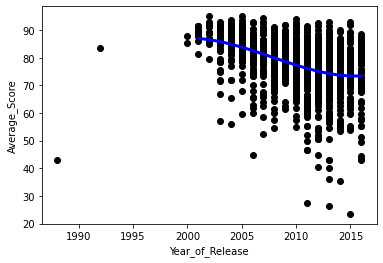

Model Accuracy:  0.17230353619420302


In [215]:
df_poly_visual = pd.DataFrame({'x': X_test[:, 0], 'y': y_pred[:, 0]})
df_poly_visual.sort_values(by='x', inplace=True)
points = pd.DataFrame(df_poly_visual).to_numpy()

plt.plot(points[:, 0], points[:, 1], color='blue', linewidth=3)
plt.xlabel('Year_of_Release')
plt.ylabel('Average_Score')
plt.scatter(X, y, color='black')
plt.show()

accuracy_score = pipeline.score(X_train, y_train)
print('Model Accuracy: ', accuracy_score)